The datasets in which we will be using here were obtained via open sources.

---

Let's begin with importing our needed libraries.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob, Word
from sklearn import metrics
import pandas as pd
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In the world of data science, it should be no surprise that we may come across the task of analyzing unstructured text and/or making a predictive model using it. Unfortunately, most techniques require numeric data. However, Natural Language Processing (NLP) can provide us a toolset of methods to convert unstructured text into meaningful numeric data. NLP is used to process (analyze, understand, and generate) natural human languages. It stores unstructured text and builds probabilistic models using the data about the language.

Here, we will practice common low-level NLP techniques and will often use a model very popular for text classification known as Naive Bayes. Let's begin using a dataset containing Yelp reviews.

In [2]:
# Let's read in the data #
yelp = pd.read_csv('./data/yelp.csv')
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [3]:
# Let's create a new dataframe that only contains the 5-star and 1-star reviews #
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [4]:
# Let's define X and y #
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [5]:
# Let's split the new dataframe into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Let's create document-term matrices from X_train and X_test #
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [7]:
# Let's check the shape of X_train (rows are documents and columns are terms or "tokens"/"features") #
print('Rows: %s \nColumns: %s' %(X_train_dtm.shape[0], X_train_dtm.shape[1]))

Rows: 3064 
Columns: 16712


In [8]:
# Let's check out the last 50 features #
print((vect.get_feature_names()[-50:]))

['zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zichini', 'zihuatenejo', 'zilch', 'zillion', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'ziploc', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombies', 'zone', 'zoners', 'zones', 'zoning', 'zoo', 'zoom', 'zoyo', 'zucca', 'zucchini', 'zuccini', 'zuchinni', 'zumba', 'zupa', 'zupas', 'zuzu', 'zzed', 'école', 'ém']


In [9]:
# Let's check out the vectorizer options #
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Note: A common method of reducing the number of features is converting all text to lowercase before generating features. This is because, to a computer, aPPle is stored as a different token than apple. However, there are cases where it might be useful not to convert them to lowercase if capitalization matters. We can see above that CountVectorizer converts the tokens to lowercase by default.

In [10]:
# Let's use Naive Bayes to predict the star rating and check the accuracy #
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

print('Accuracy:',metrics.accuracy_score(y_test, y_pred_class))

Accuracy: 0.9080234833659491


In [11]:
# Let's check out the value counts for 1-star and 5-star reviews #
y_test.value_counts()

5    823
1    199
Name: stars, dtype: int64

In [12]:
# Let's calculate the null accuracy (set 5-star to 1 and  1-star to 0) #
y_test_binary = np.where(y_test==5, 1, 0)

print('Percent of 5-stars: %s, \nPercent of 1-stars: %s' %(y_test_binary.mean(), (1 - y_test_binary.mean())))

Percent of 5-stars: 0.8052837573385518, 
Percent of 1-stars: 0.19471624266144816


We can see that our model predicted ~ 91% accuracy, which is an improvement over the baseline ~ 81% accuracy (assuming our model always predicts 5-star reviews). Let's look more into how the vectorizer works.

In [13]:
# We have 3,064 Yelp reviews in our training set and 16,712 unique words were found across all documents #
X_train_dtm

<3064x16712 sparse matrix of type '<class 'numpy.int64'>'
	with 236431 stored elements in Compressed Sparse Row format>

In [14]:
# "vocabulary_" is a dictionary that converts each word to its index in the sparse matrix #
vect.vocabulary_

{'my': 9819,
 'boyfriend': 2017,
 'and': 803,
 'stopped': 14198,
 'by': 2336,
 'to': 15127,
 'grab': 6577,
 'bite': 1746,
 'eat': 4920,
 'before': 1578,
 'work': 16458,
 'long': 8821,
 'story': 14212,
 'short': 13296,
 'greeted': 6660,
 'immediately': 7546,
 'lots': 8862,
 'of': 10232,
 'variety': 15828,
 'meat': 9280,
 'lovers': 8886,
 'pizza': 11133,
 'is': 7935,
 'amazing': 739,
 'ask': 1100,
 'for': 5984,
 'tawnya': 14762,
 'she': 13213,
 'really': 11993,
 'nice': 9983,
 'wonderful': 16430,
 'server': 13125,
 'will': 16337,
 'be': 1523,
 'back': 1312,
 'loved': 8881,
 'the': 14932,
 'excellent': 5341,
 'service': 13129,
 'when': 16254,
 'was': 16122,
 'last': 8463,
 'time': 15084,
 'that': 14927,
 'you': 16610,
 'went': 16228,
 'restaurant': 12357,
 'were': 16229,
 'still': 14162,
 'bragging': 2028,
 'about': 330,
 'your': 16617,
 'experience': 5411,
 'two': 15489,
 'weeks': 16205,
 'later': 8471,
 'this': 14991,
 'exactly': 5327,
 'what': 16242,
 'am': 725,
 'doing': 4647,
 'arrog

In [15]:
# Let's convert the sparse matrix into a typical array object #
# Note: Although this takes up much more memory than the sparse matrix, the conversion is sometimes necessary #
X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
# Let's create a function that accepts a vectorizer and calculates the accuracy #
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Number of features:', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

In [17]:
# Let's mess with the "document frequency" parameter (min_df ignores words that occur less than twice) # 
print('---'*25)
for i in range(1,6):
    vect = CountVectorizer(min_df=i, max_features=10000)
    tokenize_test(vect)
    print('---'*25)

---------------------------------------------------------------------------
Number of features: 10000
Accuracy: 0.9099804305283757
---------------------------------------------------------------------------
Number of features: 8712
Accuracy: 0.9041095890410958
---------------------------------------------------------------------------
Number of features: 6318
Accuracy: 0.9021526418786693
---------------------------------------------------------------------------
Number of features: 5093
Accuracy: 0.9031311154598826
---------------------------------------------------------------------------
Number of features: 4326
Accuracy: 0.9021526418786693
---------------------------------------------------------------------------


Let's include the use of n-grams. N-grams are features which consist of N consecutive words. This is useful because it uses the bag-of-words model; treating "data scientist" as a single feature has more meaning than having the two independent features "data" and "scientist".

In [18]:
# Let's include 1-grams and 2-grams #
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
print('Rows: %s \nColumns: %s' %(X_train_dtm.shape[0], X_train_dtm.shape[1]))

Rows: 3064 
Columns: 168423


We can observe how supplementing our features with n-grams can lead to more feature columns. However, we should be wary when we compute n-grams from an entire corpus (a collection of documents) as the number of unique n-grams could be vastly higher than the number of unique unigrams. This could lead to an undesired feature explosion and many of the new features will just be noise. Thus, if we do not have much data, adding n-grams can actually decrease model performance. This is because if each n-gram is only present once or twice in the training set, we are effectively adding mostly noisy features to the mix.

In [19]:
# Let's check out the last 50 features #
print((vect.get_feature_names()[-50:]))

['zoners out', 'zones', 'zones dolls', 'zones so', 'zoning', 'zoning issues', 'zoo', 'zoo but', 'zoo if', 'zoo is', 'zoo not', 'zoo the', 'zoo tour', 'zoom', 'zoom in', 'zoyo', 'zoyo for', 'zucca', 'zucca appetizer', 'zucchini', 'zucchini and', 'zucchini broccoli', 'zucchini carrots', 'zucchini fires', 'zucchini fries', 'zucchini pieces', 'zucchini strips', 'zucchini very', 'zucchini we', 'zucchini with', 'zuccini', 'zuccini italian', 'zuchinni', 'zuchinni again', 'zumba', 'zumba class', 'zumba or', 'zumba yogalates', 'zupa', 'zupa flavors', 'zupas', 'zupas cater', 'zuzu', 'zuzu was', 'zzed', 'zzed in', 'école', 'école lenôtre', 'ém', 'ém all']


Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners (such as "to", "the", and "and"). However, they are so commonly used that they are generally worthless for predicting the class of a document. Stop-Word Removal is the process used to remove common words that will likely appear in any text.

In [20]:
# Let's remove English stop words #
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)
vect.get_params()

Number of features: 16415
Accuracy: 0.9119373776908023


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [21]:
# Let's check out the set of stop words #
print(vect.get_stop_words())

frozenset({'might', 'any', 'however', 'somewhere', 'whence', 'has', 'yet', 'myself', 'along', 'afterwards', 'rather', 'cry', 'throughout', 'below', 'thru', 'there', 'beside', 'due', 'must', 'your', 'had', 'system', 'another', 'cannot', 'since', 'thereby', 'thick', 'seeming', 'my', 'by', 'even', 'whom', 'five', 'may', 'eight', 'mill', 'never', 'sincere', 'see', 'fire', 'neither', 'thence', 'up', 'again', 'meanwhile', 'becomes', 'her', 'con', 'from', 'nothing', 'so', 'give', 'take', 'until', 'would', 'forty', 'whither', 'than', 'hers', 'down', 'via', 'between', 'here', 'top', 'somehow', 'us', 'themselves', 'whose', 'put', 'their', 'four', 'hence', 'last', 'anyway', 'who', 'yourself', 'will', 'detail', 'whereafter', 'while', 'name', 'own', 'mine', 'three', 'above', 'mostly', 'nor', 'describe', 'except', 'across', 'nevertheless', 'found', 'each', 'but', 'became', 'back', 'made', 'bottom', 'these', 'call', 'his', 'whenever', 'against', 'for', 'me', 'hasnt', 'moreover', 'on', 'side', 'other'

As we did previously already, we can utilize the max_features parameter. If not set to None, it builds a vocabulary that only considers the top max_features (ordered by term frequency across the corpus). This allows us to keep more common n-grams and remove ones that may appear once. If we include words that only occur once, this can lead to said features being highly associated with a class and cause overfitting.

In [22]:
# Let's remove English stop words and only keep 100 features #
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Number of features: 100
Accuracy: 0.8532289628180039


In [23]:
# Let's check out all 100 features #
print(vect.get_feature_names())

['amazing', 'area', 'asked', 'awesome', 'bad', 'bar', 'best', 'better', 'big', 'came', 'cheese', 'chicken', 'clean', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'different', 'dinner', 'don', 'eat', 'excellent', 'experience', 'favorite', 'feel', 'food', 'free', 'fresh', 'friendly', 'friends', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'need', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'perfect', 'phoenix', 'pizza', 'place', 'pretty', 'price', 'prices', 'really', 'recommend', 'restaurant', 'right', 'said', 'salad', 'sauce', 'say', 'service', 'staff', 'store', 'sure', 'sweet', 'table', 'thing', 'things', 'think', 'time', 'times', 'told', 'took', 'tried', 'try', 've', 'wait', 'want', 'way', 'went', 'wine', 'work', 'worth', 'years']


In [24]:
# Let's remove English stop words and only keep 1000 features #
vect = CountVectorizer(stop_words='english', max_features=1000)
tokenize_test(vect)

Number of features: 1000
Accuracy: 0.8992172211350293


Likewise with every other model, inclusion of more features does not always lead to a better model. Thus, we must tune our feature generator to remove features whose predictive capability is none or very low. Here, there is an increase in accuracy when we double the n-gram size and increase our max features by 1,000-fold. However, we can observe that if we restrict it to only unigrams, then the accuracy increases further. This indicates that our bigrams were very likely adding more noise than signal.

In [25]:
# Let's include 1-grams and 2-grams, and limit the number of features #
print('---'*25,'\n1-grams and 2-grams, up to 100K features')
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

print('---'*25)

print('1-grams only, up to 100K features')
vect = CountVectorizer(ngram_range=(1, 1), max_features=100000)
tokenize_test(vect)
print('---'*25)

--------------------------------------------------------------------------- 
1-grams and 2-grams, up to 100K features
Number of features: 100000
Accuracy: 0.863013698630137
---------------------------------------------------------------------------
1-grams only, up to 100K features
Number of features: 16712
Accuracy: 0.9080234833659491
---------------------------------------------------------------------------


We can see above that by only using 16,712 unigram features we came away with a much smaller, simpler, and easier-to-think-about model; which also resulted in higher accuracy.

In [26]:
# Let's include 1-grams and 2-grams, and only include terms that appear at least two times #
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Number of features: 43839
Accuracy: 0.913894324853229


We can always strive for a better accuracy by optimizing model parameters. Let's continue with the use of TextBlob (a Python library which provides a simplified interface for exploring common NLP tasks including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more).

In [27]:
# Let's print the first review in our dataset #
print(yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [28]:
# Let's save the first review as a TextBlob object #
review = TextBlob(yelp_best_worst.text[0])

In [29]:
# Let's check out the list of words #
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [30]:
# Let's check out the list of sentences #
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


Stemming is the process of removing common endings from sentences (such as "s", "es", "ly", "ing", and "ed"). Ideally, this should reduce a word to its base/stem/root form. This intelligently reduces the number of features by grouping together related words.

In [31]:
# Let's initialize the stemmer #
stemmer = SnowballStemmer('english')

In [32]:
# Let's stem each word #
print([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

We can see some issues above, for example: "excellent" was stemmed to "excel" and "amazing" was stemmed to "amaz". Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word. This can be better than stemming alone as it is useful for words that do not share an obvious root such as "better" and "best".

In [33]:
# Let's assume every word is a noun #
print([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

In [34]:
# Let's assume every word is a verb #
print([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

In [35]:
# Let's create a function that accepts text and returns a list of lemmas #
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [36]:
# Let's use our function above as the feature extraction function #
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')
tokenize_test(vect)

Number of features: 16303
Accuracy: 0.9080234833659491


In [37]:
# Let's check out the last 50 features #
print(vect.get_feature_names()[-50:])

['zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zen-like', 'zero', 'zero-star', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zichini', 'zilch', 'zillion', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zip-loc', 'zipcar', 'ziploc', 'zipper', 'zipps', 'ziti', 'zoe', 'zombie', 'zone', 'zoners', 'zoning', 'zoo', 'zoom', 'zoyo', 'zucca', 'zucchini', 'zuccini', 'zuchinni', 'zumba', 'zupa', 'zupas', 'zuzu', 'zzed', 'école', 'ém']


There are many available options for CountVectorizer() that we will often wonder about which preprocessing techniques might work best. Unfortunately, more often than not, we will not know for sure without trying out many different combinations and comparing their accuracies.

While a Count Vectorizer simply just totals up the number of times a "word" appears in a document, the more complex Term Frequency–Inverse Document Frequency (TF-IDF) Vectorizer analyzes the uniqueness of words between documents to find distinguishing characteristics. TF–IDF computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.

In [38]:
# Let's create example documents #
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [39]:
# Let's check out the term frequency #
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [40]:
# Let's check out the document frequency #
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [41]:
# Let's check out the Term frequency–Inverse Document Frequency (simple version) #
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


The higher the TF–IDF value, the more "important" the word is to that specific document. Here, "cab" is the most important and unique word in document 1; while "please" is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

In [42]:
# Let's initialize the TF-IDF Vectorizer #
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


Let's use TF–IDF to summarize a Yelp review.

In [43]:
# Let's create a document-term matrix using TF–IDF #
vect = TfidfVectorizer(stop_words='english')

# Let's fit transform the Yelp data #
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [44]:
# Let's create a function to summarize reviews #
def summarize():
    
    # Let's choose a random review that is at least 300 characters #
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        review_length = len(review_text)
    
    # Let's create a dictionary of words and their TF–IDF scores #
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Let's print the words with the top five TF–IDF scores #
    print('Top Scoring Words:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Let's print five random words #
    print('\n' + 'Random Words:')
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Let's print the review #
    print('\n' + review_text)

In [45]:
summarize()

Top Scoring Words:
duce
meatball
area
heck
sliders

Random Words:
area
definitely
acquired
shortly
cream

What The Duce!?

For starters, where the heck is this place? At first, I wasn't sure if I should be walking in simply because the factory workshop look threw me off!  Um ... hello?  No worries, once we walked into the store area that's when the fun started.  This place really got my interest.  Seems to me you can purchase some vintage items and clothes.  They had stadium-seating area with a projector screen, an ice cream shake area, boxing ring, and a small gym -- where the heck am I!   

We finally found the restaurant area shortly.  The kitchen is an old school food truck, then again everything about this place is old school; chairs, tables, etc.  I ordered the sliders because it was a recommendation - meatball, chicken sausage, and bbq brisket.  A bottle of coke -- yep it figures.  Meatball sliders were the best of the 3, the sausage was definitely and acquired taste.   My sis, 

Sentiment Analysis is the understanding how positive or negative a review is. There are many ways this can be done but to obtain the most accurate sentiment analysis, we will want to train a custom sentiment model based on documents that are particular to our application. Unfortunately, generic models often do not work as well as hoped. It is imperative to always make sure we double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews. Otherwise, we may be using numbers that are not accurate.

In [46]:
print(review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [47]:
# Let's check out the polarity of the review (-1 (most negative) to 1 (most positive)) #
review.sentiment.polarity

0.40246913580246907

In [48]:
# Let's create a function that accepts text and returns the polarity #
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [49]:
# Let's create a new DataFrame column for sentiment #
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

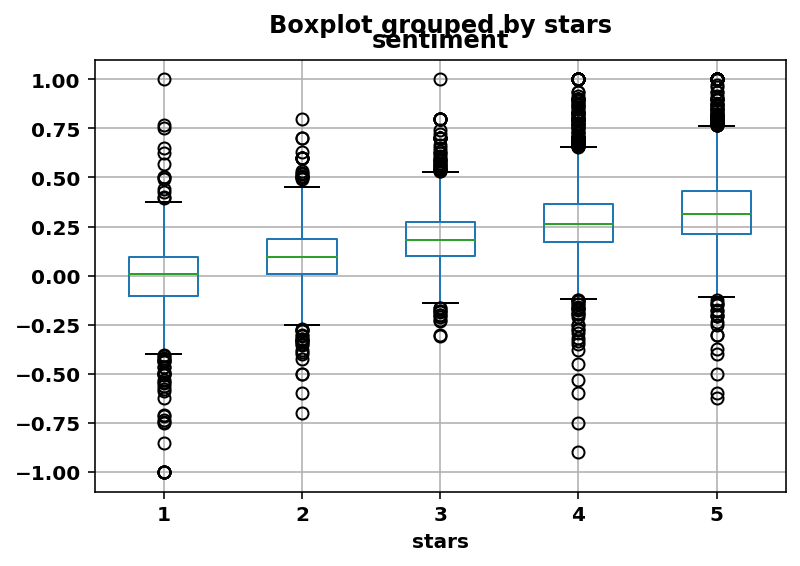

In [50]:
# Let's visualize with a box plot of sentiment grouped by stars #
yelp.boxplot(column='sentiment', by='stars');

In [51]:
# Let's check out reviews with most positive sentiment #
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \r\nA-MAZ-ING!\r\n...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [52]:
# Let's check out reviews with most negative sentiment #
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [53]:
# Let's widen the column display #
pd.set_option('max_colwidth', 500)

# Let's check out negative sentiment in a 5-star review #
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,-0.302083


In [54]:
# Let's check out positive sentiment in a 1-star review #
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,0.766667


Note: We used a generic model for the sentiment analysis above.

To make the best models possible, we will want to supplement the auto-generated features with new features we think might hold high importance. CountVectorizer() typically lowercases text and removes all associations between words. We may also have metadata to add in addition to just the text. Let's continue to add additional features to our CountVectorizer() generated feature set to improve our model.

In [55]:
# Let's reset the column display width #
pd.reset_option('max_colwidth')

# Let's create a DataFrame that only contains the 5-star and 1-star reviews #
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Let's define X and y #
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# Let's split into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
# Let's use CountVectorizer with text column only #
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)

# Let's check the shape of X_train and X_test (rows are documents and columns are terms or "tokens"/"features") #
print('[Training] -> Rows: %s ... Columns: %s' %(X_train_dtm.shape[0], X_train_dtm.shape[1]))
print('[Testing] -> Rows: %s ... Columns: %s' %(X_test_dtm.shape[0], X_test_dtm.shape[1]))

[Training] -> Rows: 3064 ... Columns: 16712
[Testing] -> Rows: 1022 ... Columns: 16712


In [57]:
# Let's check out the shape of the other four feature columns #
print('Rows: %s \nColumns: %s' %(X_train.drop('text', axis=1).shape[0], X_train.drop('text', axis=1).shape[1]))

Rows: 3064 
Columns: 4


In [58]:
# Let's cast the other feature columns to float and convert to a sparse matrix #
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
print('Rows: %s \nColumns: %s' %(extra.shape[0], extra.shape[1]))

Rows: 3064 
Columns: 4


In [59]:
# Let's combine the sparse matrices #
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
print('Rows: %s \nColumns: %s' %(X_train_dtm_extra.shape[0], X_train_dtm_extra.shape[1]))

Rows: 3064 
Columns: 16716


In [60]:
# Let's repeat for the testing set #
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
print('Rows: %s \nColumns: %s' %(X_test_dtm_extra.shape[0], X_test_dtm_extra.shape[1]))

Rows: 1022 
Columns: 16716


In [61]:
# Let's use logistic regression with the text column only #
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9207436399217221


In [62]:
# Let's use logistic regression with all features #
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

Accuracy: 0.9266144814090019
